## Plot solutions sampled form the PPD (XY and XZ maps)

Found:  500  models sampled from the PPD ...


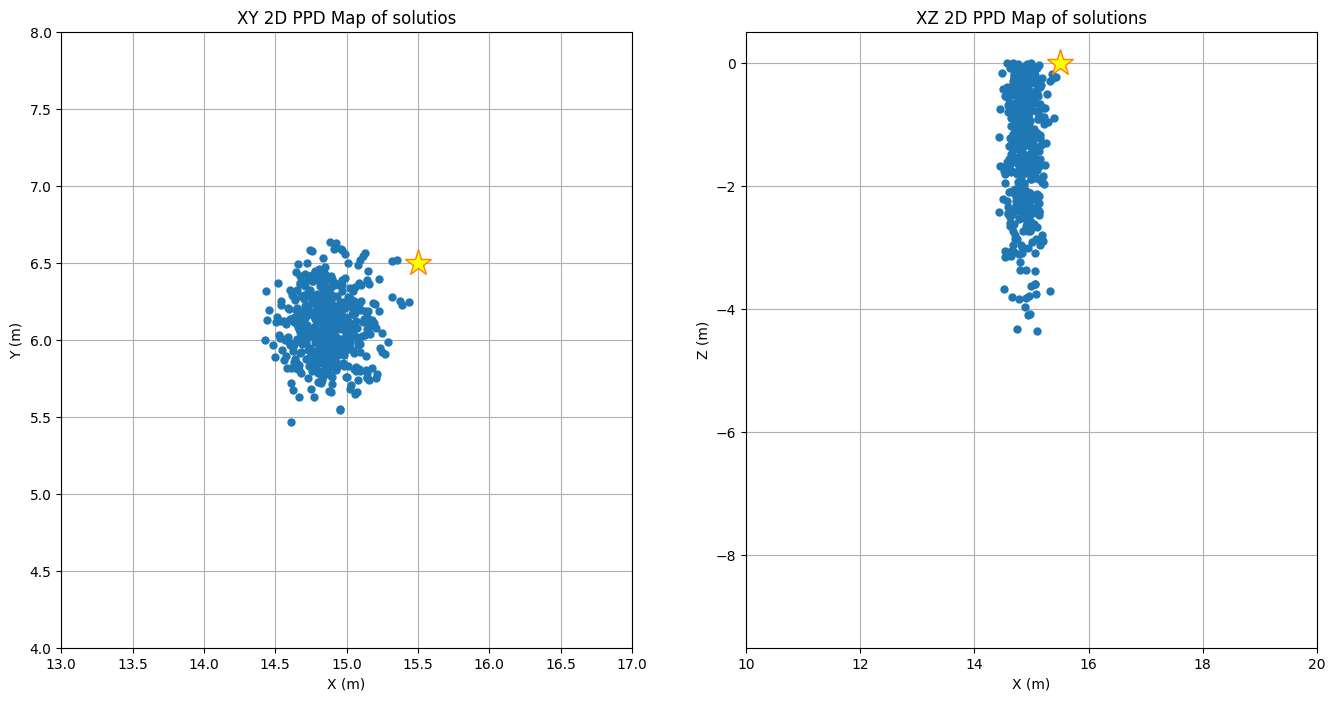

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy import signal

import sys
import os




################## EDIT HERE ##########################
results_file="./data/output/samples.dat"
outputFigure="MCMC_results.jpg"
burn_in=50000
ev_true_x=15.5
ev_true_y=6.5
ev_true_z=0.0
################## EDIT HERE ##########################




# Read results
X = []
Y = []
Z = []
resultfile = open(results_file, 'r')
linestoken=resultfile.readlines()

for x in linestoken:
    imod=int(x.split()[2])
    if imod > burn_in:
        X.append(float(x.split()[3]))
        Y.append(float(x.split()[4]))
        Z.append(float(x.split()[5]))

        
nmod=len(X)
print("Found: ", nmod, " models sampled from the PPD ...")

  
fig = plt.figure(figsize=(16.2,8))
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, width_ratios=[1,1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.title.set_text('XY 2D PPD Map of solutios' )
ax1.plot(X, Y, '.', markersize=10)
ax1.set_xlim(13,17)
ax1.set_ylim(4,8)
ax1.grid()
ax1.plot(ev_true_x, ev_true_y,marker='*', markersize=20, markerfacecolor='yellow')
ax1.set_ylabel('Y (m)')
ax1.set_xlabel('X (m)')


ax2 = fig.add_subplot(gs[0, 1])
ax2.title.set_text('XZ 2D PPD Map of solutions' )
ax2.plot(X, Z, '.', markersize=10)
ax2.set_xlim(10,20)
ax2.set_ylim(-9.5,0.5)
ax2.grid()
ax2.plot(ev_true_x, ev_true_z,marker='*', markersize=20, markerfacecolor='yellow')
ax2.set_ylabel('Z (m)')
ax2.set_xlabel('X (m)')



plt.savefig(outputFigure)
plt.show()

## Plot Correlation, Covariance, Inverse, Identity Matrices

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy import signal

import sys
import os




################## EDIT HERE ##########################
cor_file="./data/output/cor.dat"
cov_file="./data/output/cov.dat"
icov_file="./data/output/icov.dat"
iden_file="./data/output/iden.dat"
outputFigure="MCMC_results2.jpg"
################## EDIT HERE ##########################




# Read matrices
cor = np.loadtxt(cor_file)
cov = np.loadtxt(cov_file)
icov = np.loadtxt(icov_file)
iden = np.loadtxt(iden_file)



fig = plt.figure(figsize=(17,9))
gs = gridspec.GridSpec(nrows=2, ncols=2, hspace=0.3, wspace=-0.4, height_ratios=[1,1], width_ratios=[1,1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.title.set_text('CORRELATION MATRIX' )
im1=ax1.matshow(cor,cmap='viridis')
ax1.set_ylabel('data-point')
ax1.set_xlabel('data-point')
fig.colorbar(im1,ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
ax2.title.set_text('COVARIANCE MATRIX' )
im2=ax2.matshow(cov,cmap='inferno')
ax2.set_ylabel('data-point')
ax2.set_xlabel('data-point')
fig.colorbar(im2,ax=ax2)

ax3 = fig.add_subplot(gs[1, 0])
ax3.title.set_text('INVERSE MATRIX' )
im3=ax3.matshow(icov,cmap='plasma')
ax3.set_ylabel('data-point')
ax3.set_xlabel('data-point')
fig.colorbar(im3,ax=ax3)

ax4 = fig.add_subplot(gs[1, 1])
ax4.title.set_text('IDENTITY MATRIX' )
im4=ax4.matshow(iden,cmap='Greys')
ax4.set_ylabel('data-point')
ax4.set_xlabel('data-point')
fig.colorbar(im4,ax=ax4)



plt.savefig(outputFigure)
plt.show()